In [6]:
import os, sys
import xarray as xa
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pylibs.plot_utils import set_size, setupax_2dmap

In [3]:
iodafile = '/glade/derecho/scratch/swei/Dataset/input/obs/reu-ires/tropomi_s5p_no2_troposphere-ryan/obs.tropomi_s5p_no2_troposphere-ryan.2023060418.nc4'
polyfile = '/glade/work/swei/Git/JEDI-METplus/etc/polygons/reuires_polygon.csv'

In [4]:
meta_ds = xa.open_dataset(iodafile, group='MetaData')
lats = meta_ds.latitude.data
lons = meta_ds.longitude.data
# water_mask = meta_ds.surfaceQualifier.data ==

In [7]:
df = pd.read_csv(polyfile)

In [13]:
# area corner [lats.min(), lats.max(), lons.min(), lons.max()]
# area_corner = [-90., 90., -150., 0.] # original cut
# area_corner = [15., 16., -26., -25.] # EAtl
# area_corner = [-40., 10., -90., -30.] # SAmer
# area_corner = [20., 60., -130., -50.] # NAmer
# area_corner = [-90., 90., -180., 180.]
area_corner = [df['Lat'].min()-1., df['Lat'].max()+1, df['Lon'].min()-1, df['Lon'].max()+1]
area_mask = (lats > area_corner[0])&(lats < area_corner[1])&(lons > area_corner[2])&(lons < area_corner[3])
area = 'REU'

In [14]:
proj = ccrs.PlateCarree()

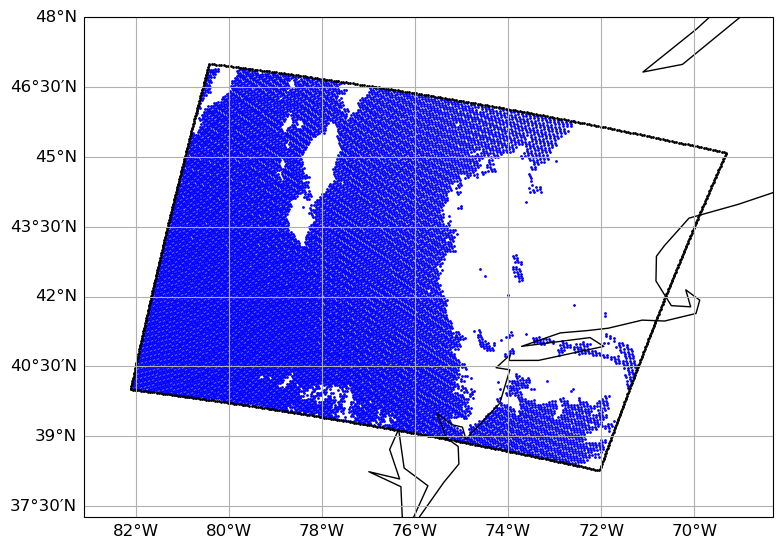

In [15]:
fig, ax, gl = setupax_2dmap(area_corner, area, proj, lbsize=12)
set_size(8, 5)
ax.scatter(lons, lats, c='b', s=1)
ax.scatter(df['Lon'], df['Lat'], c='k', s=1)


In [81]:
fig.savefig(pltsavedir + '/' + pltname, dpi=600)